# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import plot_model
import optuna
from optuna.trial import TrialState
print("We're using TF", tf.__version__)
print("We are using Keras", keras.__version__)

We're using TF 2.11.0
We are using Keras 2.11.0


In [2]:
df_train = pd.read_csv('fmnist_train.csv')
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17035
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0,17036
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17037
17038,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17038


In [3]:
df_test = pd.read_csv('fmnist_test.csv')
df_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,9995
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,9996
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,9997
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9998


# Предварительный анализ

In [4]:
print(df_train.shape)

(17040, 786)


In [5]:
# поиск дубликатов - не выявлено
df_train[df_train.duplicated()]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id


In [6]:
# поиск пропущенных значений - отсутствуют
df_train.isnull().sum().sum()

424

In [7]:
df_train = df_train.dropna()
len(df_train)

17039

In [8]:
# Разобьем исходные данные на x и y 
x_train = np.array(df_train.iloc[:,1:-1])
y_train = np.array(df_train['label'])

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [11]:
x_train.shape

(11927, 28, 28, 1)

In [12]:
x_val.shape

(5112, 28, 28, 1)

In [13]:
x_test = np.array(df_test.iloc[:,:-1])
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

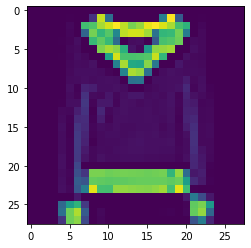

In [14]:
plt.imshow(x_val[180])
plt.show()

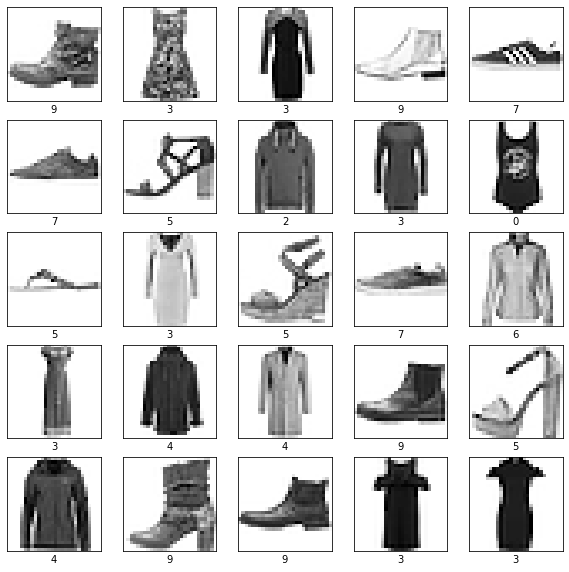

In [15]:
# Посмотрим побольше примеров
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="Greys")
    plt.xlabel(y_train[i])
plt.show()

In [16]:
# центрируем и нормируем, так сети будет проще учиться
x_train_float = x_train.astype(np.float) / 255 - 0.5
x_val_float = x_val.astype(np.float) / 255 - 0.5
x_test_float = x_test.astype(np.float) / 255 - 0.5

C:\Users\AMatycin\AppData\Local\Temp\ipykernel_7016\4143699169.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train_float = x_train.astype(np.float) / 255 - 0.5
C:\Users\AMatycin\AppData\Local\Temp\ipykernel_7016\4143699169.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_val_float = x_val.astype(np.float) / 255 - 0.5
C:\Users

In [17]:
# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(11927, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] [9 3 3 9 7]


# Модель

In [18]:
BATCH = 200
EPOCH_QTY = 30
VERBOSITY = 1

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = tf.optimizers.Adam(learning_rate=0.0006377)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [21]:
model_history = model.fit(
    x_train_float[:, :, :, np.newaxis],
    y_train_oh,
    batch_size=BATCH,
    epochs=EPOCH_QTY,
    verbose=VERBOSITY,
    validation_data=(x_val_float[:, :, :, np.newaxis], y_val_oh)
)

Epoch 1/30
60/60 [==============================] - 14s 206ms/step - loss: 1.4616 - accuracy: 0.4798 - val_loss: 0.9143 - val_accuracy: 0.6260
Epoch 2/30
60/60 [==============================] - 12s 198ms/step - loss: 0.7551 - accuracy: 0.7200 - val_loss: 0.7188 - val_accuracy: 0.7144
Epoch 3/30
60/60 [==============================] - 11s 183ms/step - loss: 0.6381 - accuracy: 0.7592 - val_loss: 0.6717 - val_accuracy: 0.7498
Epoch 4/30
60/60 [==============================] - 11s 183ms/step - loss: 0.5743 - accuracy: 0.7774 - val_loss: 0.5728 - val_accuracy: 0.7784
Epoch 5/30
60/60 [==============================] - 11s 185ms/step - loss: 0.5283 - accuracy: 0.7985 - val_loss: 0.5191 - val_accuracy: 0.8038
Epoch 6/30
60/60 [==============================] - 10s 171ms/step - loss: 0.4994 - accuracy: 0.8080 - val_loss: 0.5195 - val_accuracy: 0.8044
Epoch 7/30
60/60 [==============================] - 11s 178ms/step - loss: 0.4685 - accuracy: 0.8231 - val_loss: 0.4927 - val_accuracy: 0.8161

In [22]:
pred = model.predict(x_test_float)

313/313 [==============================] - 3s 10ms/step


In [23]:
test_loss, test_acc = model.evaluate(x_val_float, y_val_oh, verbose=2)
print('Test Accuracy: ', test_acc)

160/160 - 2s - loss: 0.3271 - accuracy: 0.8942 - 2s/epoch - 12ms/step
Test Accuracy:  0.8941705822944641


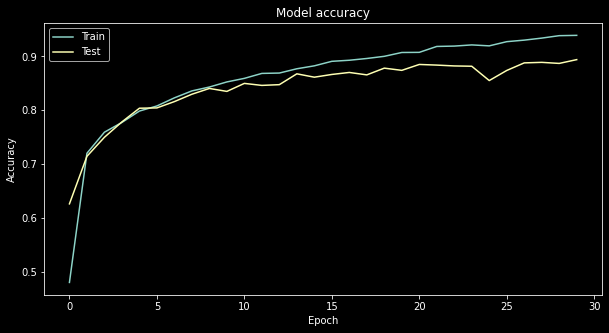

In [24]:
# Plot training & validation accuracy values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
category=[np.argmax(i) for i in pred]

In [26]:
result = {
    'Id': list(df_test.Id.values),
    'Category': category
}
solution = pd.DataFrame(result)
solution.to_csv('submission.csv', index=False)

# Подберем гиперпараметры с помощью optuna

In [27]:
def create_model(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
    units = trial.suggest_categorical("units", [32, 64, 128, 256, 512])
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(64, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(128, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(units = units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    opt = tf.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [28]:
def objective(trial):
    tf.keras.backend.clear_session()
    monitor = "val_loss"
    model = create_model(trial)


    history = model.fit(
    x_train_float[:, :, :, np.newaxis],
    y_train_oh,
    batch_size=BATCH,
    epochs=EPOCH_QTY,
    verbose=VERBOSITY,
    validation_data=(x_val_float[:, :, :, np.newaxis], y_val_oh)
)

    return history.history[monitor][-1]

In [29]:
def show_result(study):
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

In [30]:
study = optuna.create_study(direction="minimize", pruner=optuna.pruners.MedianPruner(n_startup_trials=2))

study.optimize(objective, n_trials=25, timeout=1000)

[I 2023-06-16 15:26:42,156] A new study created in memory with name: no-name-32872eaa-126d-4f8f-96d9-2fb47bffba1d


Epoch 1/30
60/60 [==============================] - 12s 178ms/step - loss: 1.5172 - accuracy: 0.4558 - val_loss: 0.8459 - val_accuracy: 0.6723
Epoch 2/30
60/60 [==============================] - 11s 182ms/step - loss: 0.7339 - accuracy: 0.7237 - val_loss: 0.7029 - val_accuracy: 0.7255
Epoch 3/30
60/60 [==============================] - 10s 174ms/step - loss: 0.6325 - accuracy: 0.7635 - val_loss: 0.6393 - val_accuracy: 0.7643
Epoch 4/30
60/60 [==============================] - 10s 173ms/step - loss: 0.5753 - accuracy: 0.7841 - val_loss: 0.6457 - val_accuracy: 0.7678
Epoch 5/30
60/60 [==============================] - 11s 187ms/step - loss: 0.5696 - accuracy: 0.7871 - val_loss: 0.5552 - val_accuracy: 0.7905
Epoch 6/30
60/60 [==============================] - 12s 196ms/step - loss: 0.5012 - accuracy: 0.8142 - val_loss: 0.5167 - val_accuracy: 0.8056
Epoch 7/30
60/60 [==============================] - 11s 180ms/step - loss: 0.4799 - accuracy: 0.8227 - val_loss: 0.5269 - val_accuracy: 0.8013

[I 2023-06-16 15:32:04,824] Trial 0 finished with value: 0.32100042700767517 and parameters: {'learning_rate': 0.0005480743076073806, 'units': 64}. Best is trial 0 with value: 0.32100042700767517.


Epoch 1/30
60/60 [==============================] - 12s 171ms/step - loss: 2.2128 - accuracy: 0.2443 - val_loss: 1.9616 - val_accuracy: 0.3232
Epoch 2/30
60/60 [==============================] - 11s 176ms/step - loss: 1.4943 - accuracy: 0.4750 - val_loss: 1.1513 - val_accuracy: 0.5700
Epoch 3/30
60/60 [==============================] - 10s 171ms/step - loss: 0.9888 - accuracy: 0.6407 - val_loss: 0.9072 - val_accuracy: 0.6782
Epoch 4/30
60/60 [==============================] - 11s 185ms/step - loss: 0.8344 - accuracy: 0.6974 - val_loss: 0.8257 - val_accuracy: 0.6964
Epoch 5/30
60/60 [==============================] - 12s 197ms/step - loss: 0.7642 - accuracy: 0.7218 - val_loss: 0.7778 - val_accuracy: 0.7076
Epoch 6/30
60/60 [==============================] - 11s 183ms/step - loss: 0.7267 - accuracy: 0.7322 - val_loss: 0.7397 - val_accuracy: 0.7203
Epoch 7/30
60/60 [==============================] - 11s 191ms/step - loss: 0.6930 - accuracy: 0.7444 - val_loss: 0.7254 - val_accuracy: 0.7312

[I 2023-06-16 15:37:44,801] Trial 1 finished with value: 0.4661501348018646 and parameters: {'learning_rate': 0.00010705354058914954, 'units': 64}. Best is trial 0 with value: 0.32100042700767517.


Epoch 1/30
60/60 [==============================] - 13s 193ms/step - loss: 5.6414 - accuracy: 0.0974 - val_loss: 2.3066 - val_accuracy: 0.0988
Epoch 2/30
60/60 [==============================] - 11s 177ms/step - loss: 2.3046 - accuracy: 0.1014 - val_loss: 2.3090 - val_accuracy: 0.1045
Epoch 3/30
60/60 [==============================] - 11s 185ms/step - loss: 2.3057 - accuracy: 0.1053 - val_loss: 2.3050 - val_accuracy: 0.1045
Epoch 4/30
60/60 [==============================] - 11s 182ms/step - loss: 2.3041 - accuracy: 0.1003 - val_loss: 2.3041 - val_accuracy: 0.0945
Epoch 5/30
60/60 [==============================] - 11s 176ms/step - loss: 2.3041 - accuracy: 0.1023 - val_loss: 2.3031 - val_accuracy: 0.0910
Epoch 6/30
60/60 [==============================] - 10s 175ms/step - loss: 2.3042 - accuracy: 0.0953 - val_loss: 2.3043 - val_accuracy: 0.1031
Epoch 7/30
60/60 [==============================] - 10s 173ms/step - loss: 2.3049 - accuracy: 0.0986 - val_loss: 2.3031 - val_accuracy: 0.0988

[I 2023-06-16 15:43:13,304] Trial 2 finished with value: 2.3037502765655518 and parameters: {'learning_rate': 0.048172997517326045, 'units': 512}. Best is trial 0 with value: 0.32100042700767517.


Epoch 1/30
60/60 [==============================] - 13s 189ms/step - loss: 2.4219 - accuracy: 0.0990 - val_loss: 2.3055 - val_accuracy: 0.0910
Epoch 2/30
60/60 [==============================] - 11s 187ms/step - loss: 2.3042 - accuracy: 0.0958 - val_loss: 2.3050 - val_accuracy: 0.1049
Epoch 3/30
60/60 [==============================] - 11s 187ms/step - loss: 2.3038 - accuracy: 0.1005 - val_loss: 2.3035 - val_accuracy: 0.1031
Epoch 4/30
60/60 [==============================] - 11s 180ms/step - loss: 2.3038 - accuracy: 0.0993 - val_loss: 2.3042 - val_accuracy: 0.0986
Epoch 5/30
60/60 [==============================] - 11s 177ms/step - loss: 2.3033 - accuracy: 0.1009 - val_loss: 2.3031 - val_accuracy: 0.0910
Epoch 6/30
60/60 [==============================] - 11s 177ms/step - loss: 2.3038 - accuracy: 0.0959 - val_loss: 2.3038 - val_accuracy: 0.0945
Epoch 7/30
60/60 [==============================] - 10s 174ms/step - loss: 2.3033 - accuracy: 0.0999 - val_loss: 2.3042 - val_accuracy: 0.0910

[I 2023-06-16 15:48:43,801] Trial 3 finished with value: 2.304680824279785 and parameters: {'learning_rate': 0.02367697380210179, 'units': 256}. Best is trial 0 with value: 0.32100042700767517.


In [31]:
show_result(study)

Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  4
Best trial:
  Value:  0.32100042700767517
  Params: 
    learning_rate: 0.0005480743076073806
    units: 64


Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  4
Best trial:
  Value:  0.33506152033805847
  Params: 
    learning_rate: 0.0006143204300735916
    units: 128